### IMPORTACIÓN DE PAQUETES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### DATA 

In [2]:
data = pd.read_csv("/content/Indice.csv") 
df = data.copy()
df.date = pd.to_datetime(df.date, dayfirst = True)
df.set_index("date", inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')

In [3]:
df['market_value']=df.ftse

In [4]:
del df['spx']
del df['dax']
del df['ftse']
del df['nikkei']
size = int(len(df)*0.8)
df, df_test = df.iloc[:size], df.iloc[size:]

### FUNCIONES DE AUTOCORRELACIÓN 

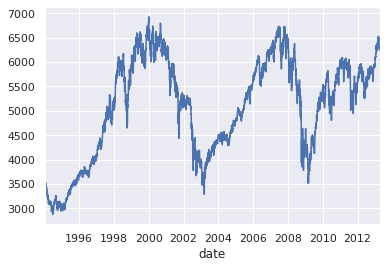

In [ ]:
df.market_value.plot()

#### AUTOCORRELACIÓN SIMPLE (ACF)

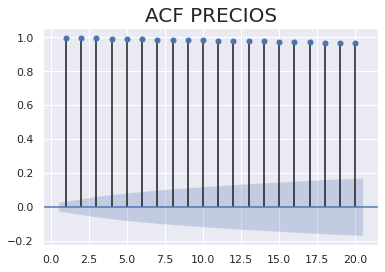

In [ ]:
sgt.plot_acf(df.market_value, zero = False, lags = 20)
plt.title("ACF PRECIOS", size = 20)
plt.show()

#### AUTOCORRELACIÓN PARCIAL (PACF)

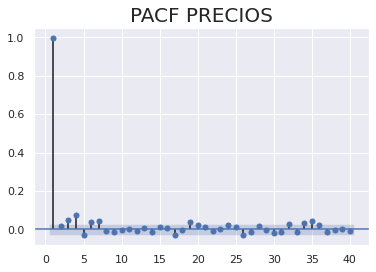

In [ ]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF PRECIOS", size = 20)
plt.show()

### AUTOREGRESIVOS AR(p)

#### MODELO AR(1)

In [5]:
 autoregressive = ARMA(df.market_value, order=(1,0))

In [6]:
ajuste =  autoregressive.fit()

In [7]:
ajuste.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Fri, 04 Jun 2021   AIC                          55251.197
Time:                        16:53:23   BIC                          55270.761
Sample:                    01-07-1994   HQIC                         55258.052
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5060.3836    486.434     10.403      0.000    4106.990    6013.777
ar.L1.market_value     0.9985      0.001   1298.792      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

#### MODELOS AR DE ORDEN SUPERIOR (Higher-Lag) 

In [12]:
 autoregressive_2 = ARMA(df.market_value, order=(2,0))
ajuste_2 =  autoregressive_2.fit()
ajuste_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Fri, 04 Jun 2021   AIC                          55251.742
Time:                        17:11:04   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    495.675     10.268      0.000    4118.137    6061.145
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4627           +0.0000j           58.4627            0.5000
-----------------------------------------------------------------------------
"""

In [13]:
 autoregressive_3 = ARMA(df.market_value, order=(3,0))
ajuste_3 =  autoregressive_3.fit()
ajuste_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27616.031
Method:                       css-mle   S.D. of innovations             59.180
Date:                Fri, 04 Jun 2021   AIC                          55242.061
Time:                        17:14:06   BIC                          55274.668
Sample:                    01-07-1994   HQIC                         55253.487
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5341.3889    642.087      8.319      0.000    4082.922    6599.856
ar.L1.market_value     0.9806      0.014     69.637      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.469      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0012           -0.0000j            1.0012           -0.0000
AR.2           -0.1853           -4.5140j            4.5178           -0.2565
AR.3           -0.1853           +4.5140j            4.5178            0.2565
-----------------------------------------------------------------------------
"""

#### Test LLR (PRUEBA DE RAZÓN DE VEROSIMILITUD)

Ho: Los modelos son iguales

Ha: Los modelos son diferentes

Si el valor_p es menor al nivel de significancia se rechaza Ho.

In [14]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [15]:
LLR_test(ajuste_2, ajuste_3)

0.001

In [16]:
 autoregressive_4 = ARMA(df.market_value, order=[4,0])
ajuste_4 =  autoregressive_4.fit()
print(ajuste_4.summary()) 
print ("LLR test: " + str(LLR_test(ajuste_3, ajuste_4)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.560
Method:                       css-mle   S.D. of innovations             59.021
Date:                Fri, 04 Jun 2021   AIC                          55217.120
Time:                        17:18:07   BIC                          55256.249
Sample:                    01-07-1994   HQIC                         55230.831
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5054.1655    558.256      9.053      0.000    3960.005    6148.326
ar.L1.market_value     0.9770      0.014     69.491      0.000       0.949       1.005
ar.L2.market_value  

In [17]:
 autoregressive_5 = ARMA(df.market_value, order=(5,0))
ajuste_5 =  autoregressive_5.fit()
print(ajuste_5.summary())
print("\nLLR test p-value = " + str(LLR_test(ajuste_4, ajuste_5)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -27600.348
Method:                       css-mle   S.D. of innovations             58.996
Date:                Fri, 04 Jun 2021   AIC                          55214.697
Time:                        17:19:00   BIC                          55260.346
Sample:                    01-07-1994   HQIC                         55230.693
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6414    543.569      9.363      0.000    4024.265    6155.018
ar.L1.market_value     0.9791      0.014     69.481      0.000       0.952       1.007
ar.L2.market_value  

In [18]:
 autoregressive_6 = ARMA(df.market_value, order=(6,0))
ajuste_6 =  autoregressive_6.fit()
print(ajuste_6.summary())
print("\nLLR test p-value = " + str(LLR_test(ajuste_5, ajuste_6)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
Method:                       css-mle   S.D. of innovations             58.950
Date:                Fri, 04 Jun 2021   AIC                          55208.947
Time:                        17:20:09   BIC                          55261.118
Sample:                    01-07-1994   HQIC                         55227.229
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    565.230      9.005      0.000    3981.811    6197.472
ar.L1.market_value     0.9803      0.014     69.604      0.000       0.953       1.008
ar.L2.market_value  

In [19]:
 autoregressive_7 = ARMA(df.market_value, order=(7,0))
ajuste_7 =  autoregressive_7.fit()
print(ajuste_7.summary())
print("\nLLR test p-value = " + str(LLR_test(ajuste_6, ajuste_7)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
Method:                       css-mle   S.D. of innovations             58.896
Date:                Fri, 04 Jun 2021   AIC                          55201.799
Time:                        17:21:05   BIC                          55260.492
Sample:                    01-07-1994   HQIC                         55222.366
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6414    589.543      8.633      0.000    3934.159    6245.124
ar.L1.market_value     0.9786      0.014     69.518      0.000       0.951       1.006
ar.L2.market_value  

In [20]:
 autoregressive_8 = ARMA(df.market_value, order=(8,0))
ajuste_8 =  autoregressive_8.fit()
print(ajuste_8.summary())
print("\nLLR test p-value = " + str(LLR_test(ajuste_7, ajuste_8)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.739
Method:                       css-mle   S.D. of innovations             58.894
Date:                Fri, 04 Jun 2021   AIC                          55203.478
Time:                        17:21:59   BIC                          55268.692
Sample:                    01-07-1994   HQIC                         55226.329
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    584.923      8.701      0.000    3943.213    6236.070
ar.L1.market_value     0.9790      0.014     69.476      0.000       0.951       1.007
ar.L2.market_value  

In [21]:
print("LLR test: " + str(LLR_test(ajuste, ajuste_7, DF = 6)))

LLR test: 0.0


### ANALISIS DE LOS RESIDUOS 

In [24]:
df['res_price'] = ajuste_7.resid
df.head()

,market_value,res_price
date,,
1994-01-07,3445.98,-1643.661387
1994-01-10,3440.58,-7.790824
1994-01-11,3413.77,-29.260309
1994-01-12,3372.02,-44.778515
1994-01-13,3360.01,-16.828096


#### ESTACIONARIEDAD

In [25]:
sts.adfuller(df.res_price)

(-76.0747127370384,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '10%': -2.5670765656497516,
  '5%': -2.8621159253018247},
 54842.414996676)

#### FUNCIONES DE AUTOCORRELACIÓN 

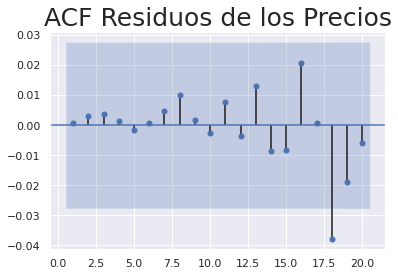

In [26]:
sgt.plot_acf(df.res_price, zero = False, lags = 20)
plt.title("ACF Residuos de los Precios",size=25)
plt.show()

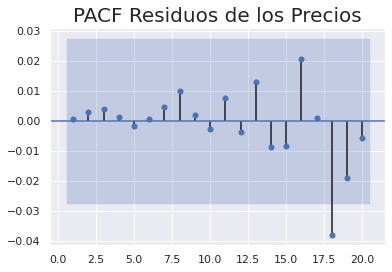

In [27]:
sgt.plot_pacf(df.res_price, lags = 20, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF Residuos de los Precios", size = 20)
plt.show()

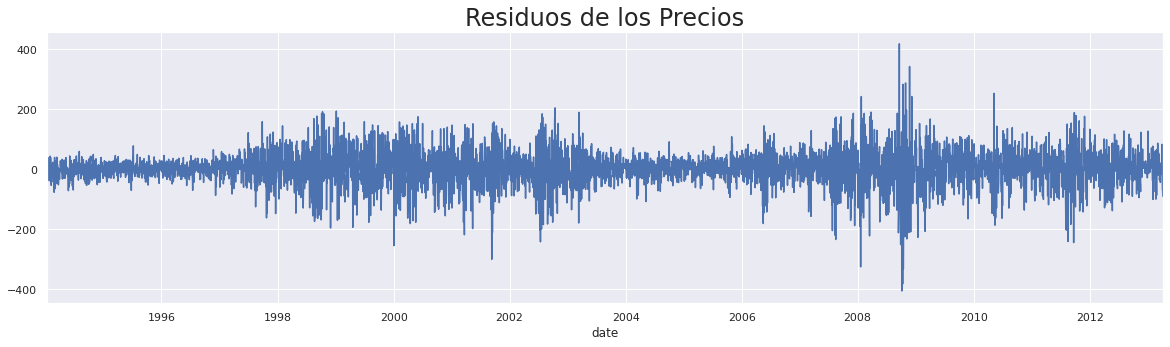

In [28]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuos de los Precios",size=24)
plt.show()

### SERIE ESTACIONARIA

**¿Y si la serie no era estacionaria?**

Existen algunas técnicas que uno puede aplicar para estacionarizar una serie cronológica. Dos de ellas con las que me encuentro más familiarizado son:

#### LOGARITMO

**Transformación:** aplicar una transformación que penalice a los valores más altos y no tanto a los valores más pequeños. Estas transformaciones pueden ser logaritmo, raíz cuadrada, raíz cúbica, etc. Este método ayuda a reducir la tendencia.

In [29]:
df['log'] = np.log(df.market_value)
df.head()


,market_value,res_price,log
date,,,
1994-01-07,3445.98,-1643.661387,8.144964
1994-01-10,3440.58,-7.790824,8.143395
1994-01-11,3413.77,-29.260309,8.135573
1994-01-12,3372.02,-44.778515,8.123267
1994-01-13,3360.01,-16.828096,8.119699


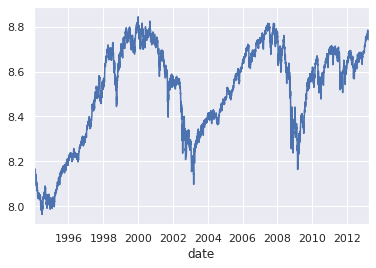

In [30]:
df.log.plot()

#### DIFERENCIA


**Diferenciación:** tomar la diferencia de la observación en un instante en particular con la de un punto anterior en el tiempo. Esto ayuda a la reducción de la tendencia y la estacionalidad, y por ende mejora la estacionariedad.

In [31]:
df['dif'] = np.log(df.market_value.shift(1))
df['dif1'] = np.log(df.market_value)-np.log(df.market_value.shift(1))
df.head()

,market_value,res_price,log,dif,dif1
date,,,,,
1994-01-07,3445.98,-1643.661387,8.144964,NaN,NaN
1994-01-10,3440.58,-7.790824,8.143395,8.144964,-0.001568
1994-01-11,3413.77,-29.260309,8.135573,8.143395,-0.007823
1994-01-12,3372.02,-44.778515,8.123267,8.135573,-0.012305
1994-01-13,3360.01,-16.828096,8.119699,8.123267,-0.003568


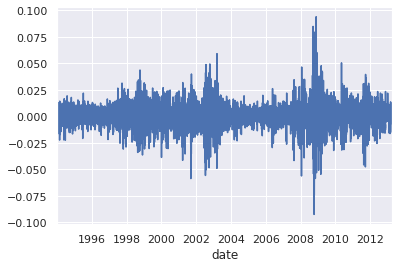

In [33]:
#df.dif.plot()
df.dif1.plot()

##### DIFERENCIA ESTÁNDAR

La forma más sencilla de aplicar la diferenciación en Python es utilizar el **diff** método de a pd.DataFrame. El uso del valor predeterminado del periodsargumento da como resultado una serie diferenciada como se describe en la fórmula anterior.

In [34]:
df['diff_1'] = (df.market_value.diff(periods=1))
df['diff_2'] = (df.market_value.diff(periods=2))
df.head()

,market_value,res_price,log,dif,dif1,diff_1,diff_2
date,,,,,,,
1994-01-07,3445.98,-1643.661387,8.144964,NaN,NaN,NaN,NaN
1994-01-10,3440.58,-7.790824,8.143395,8.144964,-0.001568,-5.40,NaN
1994-01-11,3413.77,-29.260309,8.135573,8.143395,-0.007823,-26.81,-32.21
1994-01-12,3372.02,-44.778515,8.123267,8.135573,-0.012305,-41.75,-68.56
1994-01-13,3360.01,-16.828096,8.119699,8.123267,-0.003568,-12.01,-53.76


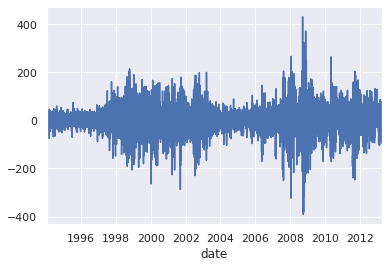

In [ ]:
df.diff_1.plot()

##### DIFERECNIA RECURSIVA

Ya hemos visto el pandas'asumir **diff**. *numpyes* un poco diferente, ya que implementa diferenciación recursiva. Cuando se trata de diferenciación recursiva, el número de veces que se realiza la diferenciación se denomina orden de diferencia . Comencemos de inmediato con un ejemplo de cómo aplicar la transformación con un orden de diferencia de 2 al mismo conjunto de datos. Esto significa que primero aplicamos la diferenciación regular (como en el pandascaso anterior) y luego aplicamos la transformación nuevamente a la serie ya diferenciada. De ahí la parte de recursividad. 

In [35]:
df['diff_o1'] = np.append(np.nan, np.diff(df.market_value))
df['diff_o2'] = np.append([np.nan] * 2, np.diff(df.market_value, n=2))
df.head()

,market_value,res_price,log,dif,dif1,diff_1,diff_2,diff_o1,diff_o2
date,,,,,,,,,
1994-01-07,3445.98,-1643.661387,8.144964,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-10,3440.58,-7.790824,8.143395,8.144964,-0.001568,-5.40,NaN,-5.40,NaN
1994-01-11,3413.77,-29.260309,8.135573,8.143395,-0.007823,-26.81,-32.21,-26.81,-21.41
1994-01-12,3372.02,-44.778515,8.123267,8.135573,-0.012305,-41.75,-68.56,-41.75,-14.94
1994-01-13,3360.01,-16.828096,8.119699,8.123267,-0.003568,-12.01,-53.76,-12.01,29.74


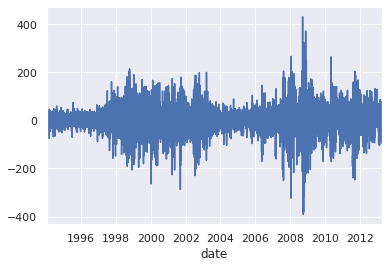

In [ ]:
df.diff_o1.plot()

#### RETORNOS

In [36]:
df['returns'] = df.market_value.pct_change(1)*100
df.head()

,market_value,res_price,log,dif,dif1,diff_1,diff_2,diff_o1,diff_o2,returns
date,,,,,,,,,,
1994-01-07,3445.98,-1643.661387,8.144964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-10,3440.58,-7.790824,8.143395,8.144964,-0.001568,-5.40,NaN,-5.40,NaN,-0.156704
1994-01-11,3413.77,-29.260309,8.135573,8.143395,-0.007823,-26.81,-32.21,-26.81,-21.41,-0.779229
1994-01-12,3372.02,-44.778515,8.123267,8.135573,-0.012305,-41.75,-68.56,-41.75,-14.94,-1.222988
1994-01-13,3360.01,-16.828096,8.119699,8.123267,-0.003568,-12.01,-53.76,-12.01,29.74,-0.356166


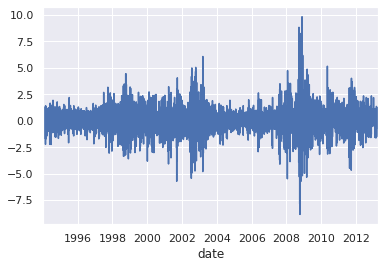

In [ ]:
df.returns.plot()

#### MODELO AR PARA SERIE ESTACIONARIA

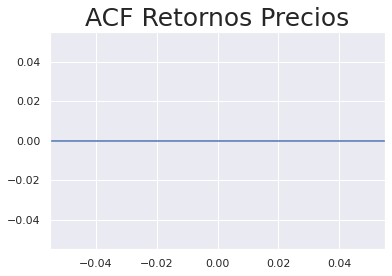

In [ ]:
sgt.plot_acf(df.returns, zero = False, lags = 20)
plt.title("ACF Retornos Precios",size=25)
plt.show()

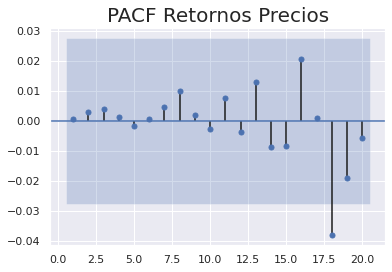

In [ ]:
sgt.plot_pacf(df.res_price, lags = 20, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF Retornos Precios", size = 20)
plt.show()